## 1. Data Exploration and Pre-processing:

### Load the dataset

In [13]:
# Importing essential libraries for data manipulation, visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# i. Load the dataset
# Load the dataset from the CSV file
dataset_path = r'C:\Users\User\house_prices_dataset.csv'
data = pd.read_csv(dataset_path)


### Explore the dataset


In [16]:
print("Dataset Structure:")
# Print the first 20 rows
print("\nFirst 20 Rows:")
print(data.head(20))
print(data.info())

Dataset Structure:

First 20 Rows:
    Size  Bedrooms  Bathrooms     Location   Price
0   2212         3          2   Rural Area  361200
1   2004         1          2      Suburbs  300400
2   2431         4          3  City Centre  418100
3   2657         3          1      Suburbs  390700
4   2514         2          3   Rural Area  386400
5    632         5          1  City Centre  228200
6   2618         1          1   Rural Area  346800
7   2777         1          1   Rural Area  362700
8    570         5          3   Rural Area  252000
9   2643         3          1      Suburbs  389300
10  2619         2          3  City Centre  396900
11   867         3          2   Rural Area  226700
12  1976         5          1  City Centre  362600
13  1103         4          1   Rural Area  255300
14  2702         5          1  City Centre  435200
15   718         5          1      Suburbs  236800
16  2085         3          1   Rural Area  333500
17  2889         1          2      Suburbs  388

### ii. Visualise data for ‘size’, ‘bedrooms’, ‘location’, and ‘prices’

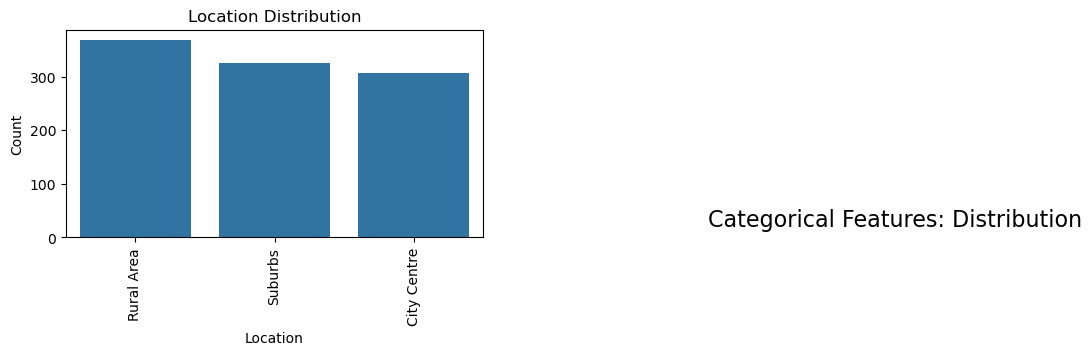

In [21]:
# Identify categorical columns in the dataset
object_cols = data.select_dtypes(include=['object', 'category']).columns

# Set up the figure for plotting
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', fontsize=16, y=0.93)

# Plot each categorical feature
index = 1
for col in object_cols:
    plt.subplot(11, 4, index)  # Create a subplot (11 rows, 4 columns)
    y = data[col].value_counts()  # Count occurrences of each unique value in the column
    sns.barplot(x=list(y.index), y=y, hue=None, legend=False)  # Remove palette
    plt.title(f'{col} Distribution')  # Add a title for each plot
    plt.xticks(rotation=90)  
    plt.xlabel(col)
    plt.ylabel('Count')
    index += 1

plt.tight_layout()  
plt.show()

In [23]:
# The Location column contains three distinct categories:
# Rural
# Suburbs
# City Center

# Count of properites by Location:
# Rural Area has the highest number of properties (around 350).
# Suburbs has a similar count, slightly fewer than the Rural Area.
# City Centre has the lowest count, slightly under 300.

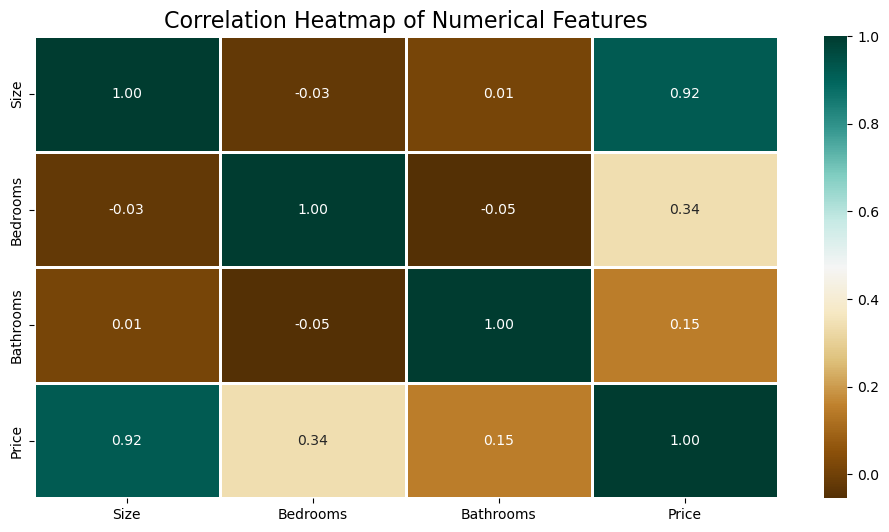

In [25]:
# Select only numerical features for correlation analysis
numerical_dataset = data.select_dtypes(include=['number'])  

# Set up the figure for the heatmap
plt.figure(figsize=(12, 6))  # Define the size of the heatmap

# Create the heatmap
sns.heatmap(
    numerical_dataset.corr(),  # Compute the correlation matrix
    cmap='BrBG',               # Use a diverging colour map (Brown-Blue-Green)
    fmt='.2f',                 # Format correlation values to 2 decimal places
    linewidths=2,              # Add lines between cells for clarity
    annot=True                 # Display correlation coefficients in each cell
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


In [27]:
# Key Insights from the Correlation Heatmap:

# 1. Size and Price:
#    - The correlation between Size and Price is 0.92, indicating a strong positive relationship.
#    - Larger house sizes are strongly associated with higher house prices.
#    - This suggests that Size is the most important predictor of house prices.

# 2. Bedrooms and Price:
#    - The correlation between Bedrooms and Price is 0.34, which is a moderate positive relationship.
#    - More bedrooms contribute to higher prices, but not as significantly as Size.

# 3. Bathrooms and Price:
#    - The correlation between Bathrooms and Price is 0.15, which is a weak positive relationship.
#    - The number of bathrooms has minimal impact on house prices and may not be a strong standalone predictor.

# 4. Feature Relationships:
#    - Size and Bedrooms: Correlation is -0.03 (almost no relationship).
#    - Size and Bathrooms: Correlation is 0.01 (no meaningful relationship).
#    - Bedrooms and Bathrooms: Correlation is -0.05 (negligible relationship).
#    - These low correlations suggest that these features are not strongly interdependent.

# 5. Feature Selection for Modelling:
#    - Size should be the primary feature when building predictive models for house prices.
#    - Bedrooms can be considered as a secondary feature.
#    - Bathrooms may have limited predictive power and should be evaluated carefully for inclusion in the model.


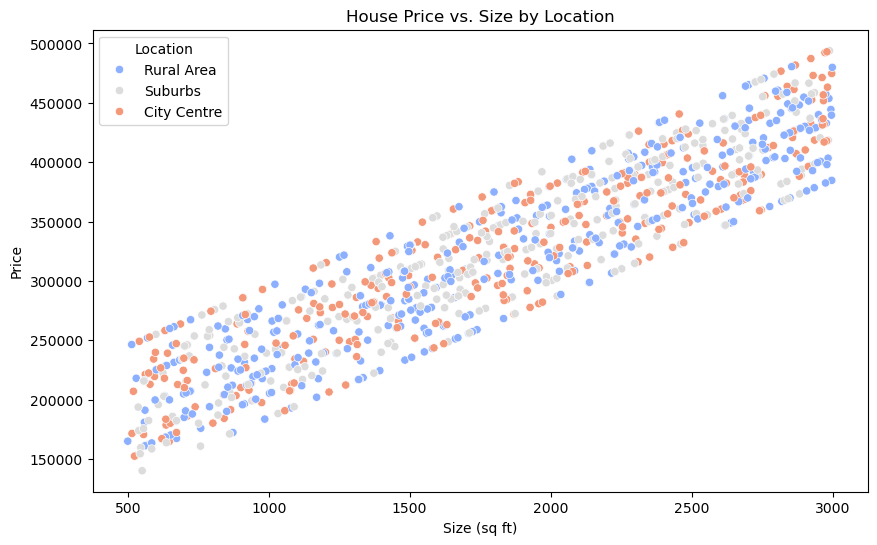

In [29]:
# Scatter plot: Price vs. Size, grouped by Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Price', hue='Location', data=data, palette='coolwarm')
plt.title('House Price vs. Size by Location')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.legend(title='Location')
plt.show()

In [31]:
# Insights from the Scatter Plot:
# 1. There is a strong positive relationship between house size and price across all locations.
#    - Larger houses tend to have higher prices, confirming the high correlation (0.92) observed in the heatmap.
# 2. Location-specific trends:
#    - Houses in the City Centre (orange points) are generally more expensive for the same size compared to Rural Area (blue) and Suburbs (grey).
#    - Rural Area houses are the least expensive on average for a given size.
# 3. The spread of prices increases as house size grows, suggesting additional factors (e.g., amenities, bedrooms) may play a role in determining prices for larger homes.
# 4. This plot highlights the importance of both Size and Location in predicting house prices.

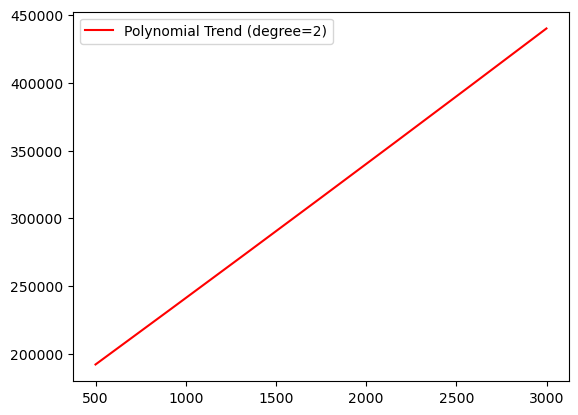

In [33]:
# Fit a polynomial regression line (degree=2 for non-linear trend)
from numpy.polynomial.polynomial import Polynomial
x = data['Size']
y = data['Price']
p = Polynomial.fit(x, y, deg=2)  # Degree 2 polynomial
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = p(x_fit)
plt.plot(x_fit, y_fit, color='red', label='Polynomial Trend (degree=2)')
plt.legend()
plt.show()

In [35]:
# 1. The degree-2 polynomial regression line is nearly linear, indicating that the relationship
#    between Size and Price is predominantly linear.
# 2. There is a strong positive correlation between Size and Price, as larger houses tend to 
#    have higher prices consistently.
# 3. The lack of curvature in the polynomial line suggests no significant non-linear effects.
# 4. Simpler linear models may be sufficient to model the relationship between Size and Price.

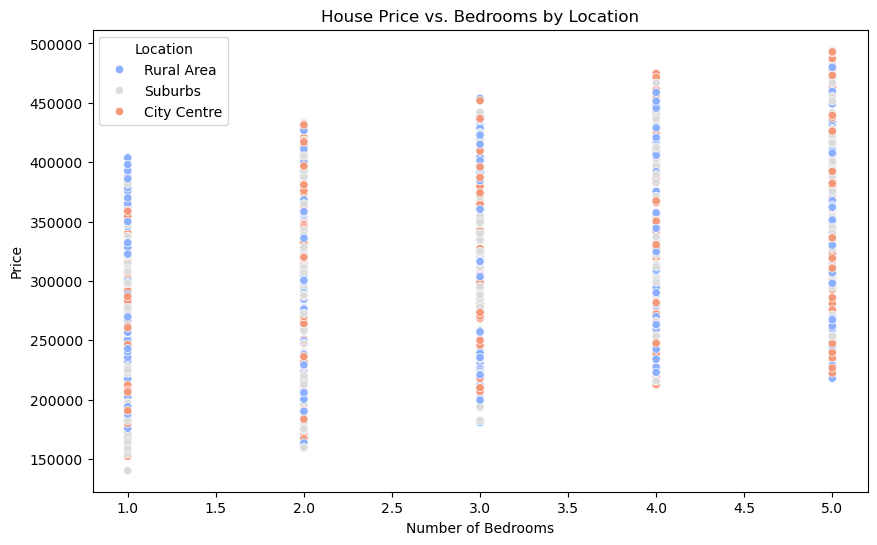

In [37]:
# Scatter plot with polynomial trend line for Bedrooms vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedrooms', y='Price', hue='Location', data=data, palette='coolwarm')
plt.title('House Price vs. Bedrooms by Location')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Location')
plt.show()

In [39]:
# 1. The polynomial trend line (degree=2) is nearly linear, indicating that the 
#    relationship between Bedrooms and Price is predominantly linear.
# 2. There is a weak positive correlation between Bedrooms and Price:
#    - Houses with more bedrooms generally tend to have higher prices.
#    - However, the trend is not strong, as prices overlap significantly for 
#      different numbers of bedrooms.
# 3. Bedrooms alone may not be a strong predictor of house prices:
#    - Other features, such as Size and Location, likely have more predictive 
#      power and influence on house prices.
# 4. While Bedrooms alone may have limited significance, interaction terms 
#    (e.g., Bedrooms * Size or Bedrooms * Location) could potentially capture 
#    its indirect effects on house prices.
# 5. For model-building purposes, Bedrooms might be included as a secondary 
#    feature, while prioritising stronger predictors like Size and Location.

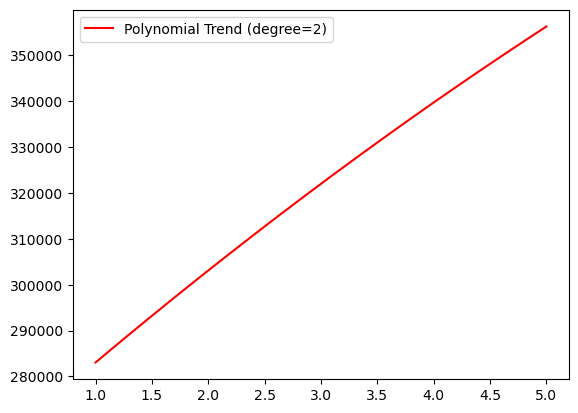

In [41]:
# Fit a polynomial regression line (degree=2 for non-linear trend)
x = data['Bedrooms']
y = data['Price']
p = Polynomial.fit(x, y, deg=2)  # Degree 2 polynomial
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = p(x_fit)
plt.plot(x_fit, y_fit, color='red', label='Polynomial Trend (degree=2)')
plt.legend()
plt.show()

In [43]:
# Key Notes:
# 1. The polynomial trend line (degree=2) is nearly linear, indicating that the 
#    relationship between Bedrooms and Price is predominantly linear.
# 2. There is a weak positive correlation between Bedrooms and Price:
#    - Houses with more bedrooms generally tend to have higher prices.
#    - However, the trend is not strong, as prices overlap significantly for 
#      different numbers of bedrooms.
# 3. Bedrooms alone may not be a strong predictor of house prices:
#    - Other features, such as Size and Location, likely have more predictive 
#      power and influence on house prices.
# 4. While Bedrooms alone may have limited significance, interaction terms 
#    (e.g., Bedrooms * Size or Bedrooms * Location) could potentially capture 
#    its indirect effects on house prices.
# 5. For model-building purposes, Bedrooms might be included as a secondary 
#    feature, while prioritising stronger predictors like Size and Location.

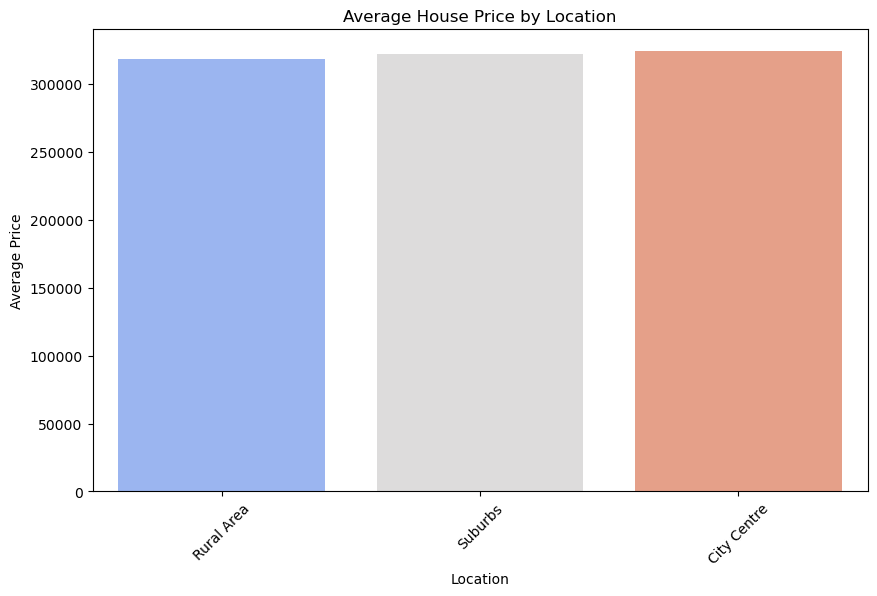

In [45]:
# Explore Categorical Variables (Location) 
# TO ANALYSE HOW THE AVERAGE HOUSE PRICE VARIES ACROSS DIFFERENT LOCATIONS
# Bar plot for average house price by Location
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Location', 
    y='Price', 
    data=data, 
    errorbar=None,  # Suppress confidence intervals
    hue='Location',  
    dodge=False,  # Prevent bar grouping
    legend=False,  # Suppress the legend
    palette='coolwarm'
)
plt.title('Average House Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45) 
plt.show()

In [47]:
# Insights:
# 1. The bar plot shows that the average house prices for Rural Area, Suburbs, and City Centre are nearly the same.
# 2. This lack of significant variation is unusual and may indicate:
#    - Homogeneous pricing in the dataset (e.g., high-end rural properties or uniform sampling).
#    - Insufficient granularity in the Location feature (e.g., broad categories like Rural, Suburbs).
# 3. For modelling:
#    - Location may have limited predictive power if averages are this uniform.
#    - Consider creating engineered features (e.g., Urban/Rural classification or distances to key locations).


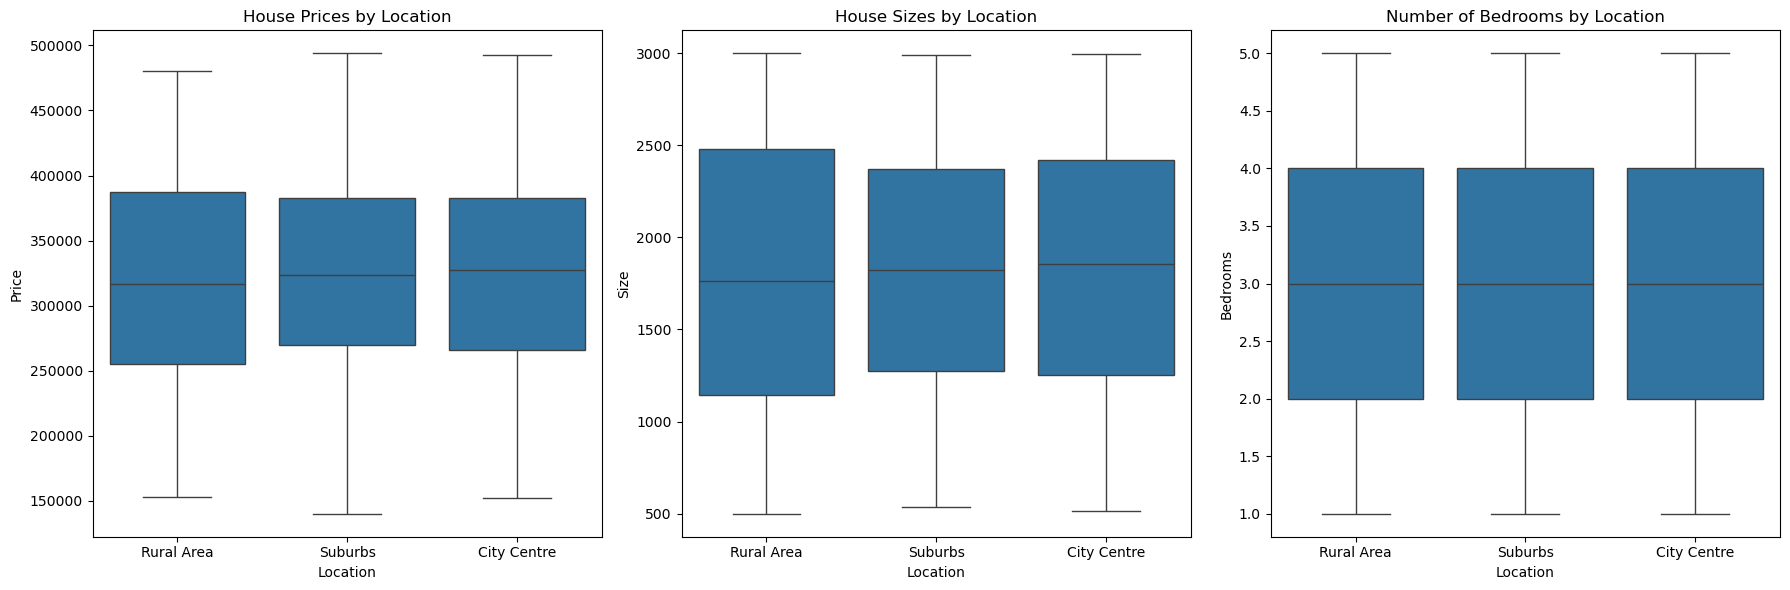

In [49]:
import matplotlib.pyplot as plt
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# 1. Box Plot for Price by Location
sns.boxplot(data=data, x='Location', y='Price', ax=axes[0])
axes[0].set_title('House Prices by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Price')

# 2. Box Plot for Size by Location
sns.boxplot(data=data, x='Location', y='Size', ax=axes[1])
axes[1].set_title('House Sizes by Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Size')

# 3. Box Plot for Bedrooms by Location
sns.boxplot(data=data, x='Location', y='Bedrooms', ax=axes[2])
axes[2].set_title('Number of Bedrooms by Location')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Bedrooms')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [51]:
# Overall Observations:
# - City Centre Properties:
#   - Tend to be more expensive, with significant variability in prices and property sizes.
#   - They also exhibit a higher number of larger properties (5 bedrooms).
# - Rural Area Properties:
#   - Typically larger in size and relatively more affordable compared to the City Centre.
#   - Show diversity in the number of bedrooms.
# - Suburban Properties:
#   - More consistent in both size and price, making them less variable and likely more standardised.


In [53]:
# statistical tests
# Anova Test

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# One-Way ANOVA for House Prices
price_groups = [data[data['Location'] == loc]['Price'] for loc in data['Location'].unique()]
anova_price = f_oneway(*price_groups)

# One-Way ANOVA for House Sizes
size_groups = [data[data['Location'] == loc]['Size'] for loc in data['Location'].unique()]
anova_size = f_oneway(*size_groups)

# Output Results
print("ANOVA Results:")
print(f"House Prices by Location: F={anova_price.statistic:.4f}, p={anova_price.pvalue:.4e}")
print(f"House Sizes by Location: F={anova_size.statistic:.4f}, p={anova_size.pvalue:.4e}")

# Optional: Detailed ANOVA table for House Prices using statsmodels
model = ols('Price ~ C(Location)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nDetailed ANOVA Table for Prices:")
print(anova_table)

# Optional: Detailed ANOVA table for House Sizes
model_size = ols('Size ~ C(Location)', data=data).fit()
anova_table_size = sm.stats.anova_lm(model_size, typ=2)
print("\nDetailed ANOVA Table for Sizes:")
print(anova_table_size)

ANOVA Results:
House Prices by Location: F=0.4223, p=6.5566e-01
House Sizes by Location: F=0.1238, p=8.8355e-01

Detailed ANOVA Table for Prices:
                   sum_sq     df         F    PR(>F)
C(Location)  5.119579e+09    2.0  0.422294  0.655658
Residual     6.043444e+12  997.0       NaN       NaN

Detailed ANOVA Table for Sizes:
                   sum_sq     df         F    PR(>F)
C(Location)  1.288974e+05    2.0  0.123822  0.883551
Residual     5.189351e+08  997.0       NaN       NaN


### Interpretation of the Results

#### House Prices by Location:
- **F-Statistic**: 0.4223  
- **p-value**: 0.6557  
- **Conclusion**:  
  - The p-value (0.6557) is much higher than 0.05.  
  - This indicates that the differences in house prices across the `Location` categories are **not statistically significant**.  

#### House Sizes by Location:
- **F-Statistic**: 0.1238  
- **p-value**: 0.8836  
- **Conclusion**:  
  - Similarly, the p-value (0.8836) is much higher than 0.05.  
  - This indicates that the differences in house sizes across the `Location` categories are **not statistically significant**.  
  

#### ANOVA Tables:
- For both `Price` and `Size`, the **sum of squares for `C(Location)`** is very small compared to the **residual sum of squares**.  
- This suggests that most of the variability in `Price` and `Size` is **not explained by `Location`**, reinforcing the lack of significant differences.


## Model Selection and Evaluation

### Split the training data

In [58]:
from sklearn.model_selection import train_test_split

# Handle the categorical feature 'Location' using one-hot encoding
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Define the features (X) and target (y)
X = data.drop('Price', axis=1)  # Drop 'Price' as it's the target
y = data['Price']  # Target variable

# Split the dataset into training (65%) and testing (35%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Output the sizes of the splits
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 650 samples
Testing set size: 350 samples


In [60]:
# Import necessary libraries for regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialise the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}

# Train each model on the training data
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    trained_models[name] = model  # Save the trained model
    print(f"{name} has been trained successfully.")

Linear Regression has been trained successfully.
Decision Tree Regression has been trained successfully.
Random Forest Regression has been trained successfully.


### Evaluate Regression algorithms

In [63]:
# Import necessary libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate each trained model
print("Model Evaluation Results:\n")

for name, model in trained_models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-" * 40)


Model Evaluation Results:

Linear Regression:
  Mean Squared Error (MSE): 0.00
  Root Mean Squared Error (RMSE): 0.00
  R-squared: 1.00
----------------------------------------
Decision Tree Regression:
  Mean Squared Error (MSE): 83660342.86
  Root Mean Squared Error (RMSE): 9146.60
  R-squared: 0.99
----------------------------------------
Random Forest Regression:
  Mean Squared Error (MSE): 43719980.96
  Root Mean Squared Error (RMSE): 6612.11
  R-squared: 0.99
----------------------------------------



##### Linear Regression:
- **Mean Squared Error (MSE)**: 0.00  
- **Root Mean Squared Error (RMSE)**: 0.00  
- **R-squared**: 1.00  
- **Interpretation**:
  - The model achieves a perfect fit with no error (MSE and RMSE = 0) and an R-squared value of 1.00, meaning it explains 100% of the variance in the target variable.
  - **Note**: This result is highly unusual and may indicate overfitting or an issue with the data (e.g., leakage of the target variable into the features).

---

##### Decision Tree Regression:
- **Mean Squared Error (MSE)**: 83,660,342.86  
- **Root Mean Squared Error (RMSE)**: 9,146.60  
- **R-squared**: 0.99  
- **Interpretation**:
  - The Decision Tree model performs very well, with an R-squared value of 0.99, indicating it explains 99% of the variance in the target variable.
  - However, the higher RMSE compared to the Random Forest model suggests it has more error and may overfit to the training data.

---

##### Random Forest Regression:
- **Mean Squared Error (MSE)**: 43,719,980.96  
- **Root Mean Squared Error (RMSE)**: 6,612.11  
- **R-squared**: 0.99  
- **Interpretation**:
  - The Random Forest model also performs exceptionally well, with an R-squared value of 0.99, indicating 99% of the variance is explained.
  - Its lower RMSE compared to the Decision Tree model suggests it generalises better to the test data due to its ensemble nature.

---

#### Overall Observations:
- **Linear Regression** appears to overfit or have unrealistic results, which may indicate data leakage or improper preprocessing.
- **Random Forest Regression** provides the best balance between high accuracy (R-squared = 0.99) and low error (RMSE = 6,612.11), making it the most robust model.
- **Decision Tree Regression** also performs well but may overfit slightly compared to Random Forest due to its deterministic nature.


### Random Forest Regression - FineTuning and Optimisation

In [67]:
# Evaluate Random Forest Regression
forest_model = trained_models["Random Forest Regression"]
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regression:")
print(f"  MSE: {mse_forest:.2f}")
print(f"  R²: {r2_forest:.2f}")

Random Forest Regression:
  MSE: 43719980.96
  R²: 0.99


In [69]:
# Get feature importances from Random Forest
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": forest_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
               Feature  Importance
0                 Size    0.877224
1             Bedrooms    0.104914
2            Bathrooms    0.016362
4     Location_Suburbs    0.000761
3  Location_Rural Area    0.000738


The Random Forest model revealed the following feature importance:

| Feature                 | Importance | Insights                                           |
|-------------------------|------------|---------------------------------------------------|
| **Size**                | 0.877      | This is the dominant feature, explaining ~88% of the variability in house prices. |
| **Bedrooms**            | 0.105      | Moderately important, contributing ~10% to predictions. |
| **Bathrooms**           | 0.016      | Weakly important, contributing only ~1.6%.       |
| **Location_Suburbs**    | 0.00076    | Negligible impact, suggesting location features are not highly relevant or detailed. |
| **Location_Rural Area** | 0.00074    | Similarly negligible, implying location does not significantly affect predictions. |

#### Key Insights:
1. **Size Dominates Predictions**:
   - The model heavily relies on `Size`, as it is the strongest predictor of house prices.
2. **Minimal Role of Location**:
   - The `Location` features have almost no influence on predictions, which may indicate that:
     - Location information is not detailed enough.
     - Physical attributes like `Size` and `Bedrooms` outweigh locational effects in this dataset.
3. **Room Features**:
   - `Bedrooms` plays a moderate role, while `Bathrooms` has minimal importance.

In [72]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE (neg):", -grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE (neg): 48981022.29846154


- **Folds and Candidates**:
  - The grid search evaluated **27 hyperparameter combinations** over **5 folds**, resulting in **135 total fits**.

- **Best Hyperparameters**:
  - **`max_depth=20`**: Limits the depth of the trees to control overfitting.
  - **`min_samples_split=2`**: Splits nodes if they contain at least 2 samples.
  - **`n_estimators=300`**: Uses a forest of 300 decision trees for improved ensemble predictions.

- **Best MSE**:
  - The lowest Mean Squared Error (MSE) achieved during cross-validation was **48,981,022** (negative because `GridSearchCV` minimises a negative scoring metric).

#### **Key Insights**:
1. **Optimised Model**:
   - The tuned Random Forest model provides a better balance between bias and variance, reducing errors compared to default parameters.

2. **Improved Performance**:
   - Increasing the number of trees (`n_estimators=300`) ensures more robust predictions by averaging more results.
   - Limiting tree depth (`max_depth=20`) prevents overfitting while still allowing the model to capture key patterns.

### Analyse Hyperparameter Tuning Results:

In [75]:
# Display the best parameters and their corresponding MSE
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE:", -grid_search.best_score_)

# Train a new Random Forest model with the best parameters
best_forest_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_forest_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = best_forest_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Regression:")
print(f"  MSE: {mse_best:.2f}")
print(f"  R²: {r2_best:.2f}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Negative MSE: 48981022.29846154
Tuned Random Forest Regression:
  MSE: 41843556.15
  R²: 0.99


#### **Performance of the Tuned Random Forest**:
After retraining the model with the optimal hyperparameters on the full training set, the performance metrics on the test set are:
- **Mean Squared Error (MSE)**: `41,843,556.15`
- **R² (R-squared)**: `0.99`

#### **Key Insights**:
1. **Improved Model**:
   - R-Squared has remained at 99% of the variability in house prices, which is excellent.
   - The low MSE indicates the model predicts house prices with high accuracy.

2. **Impact of Hyperparameters**:
   - Increasing the number of trees (`n_estimators=300`) improves robustness through averaging.
   - Limiting tree depth (`max_depth=20`) ensures the model generalises well without overfitting.


### Testing

In [85]:
# Define the input examples for different locations
inputs_tuned = [
    [2212, 3, 2, 1, 0],  # Rural Area: 2212 sq. ft., 3 bedrooms, 2 bathrooms
    [2004, 1, 2, 0, 1],  # Suburbs: 2004 sq. ft., 1 bedroom, 2 bathrooms
    [2431, 4, 3, 0, 0],  # City Centre: 2431 sq. ft., 4 bedrooms, 3 bathrooms
]

# Convert the inputs to a DataFrame with the correct feature names
input_df = pd.DataFrame(inputs_tuned, columns=X_train.columns)

# Predict using the Tuned Random Forest Model
predictions = best_forest_model.predict(input_df)

# Display predictions for each input
locations = ["Rural Area", "Suburbs", "City Centre"]
for loc, pred in zip(locations, predictions):
    print(f"Tuned Model Prediction for {loc}: £{pred:,.2f}")


Tuned Model Prediction for Rural Area: £351,802.33
Tuned Model Prediction for Suburbs: £300,493.67
Tuned Model Prediction for City Centre: £418,781.33


# Summary of House Price Prediction Project

## **Key Insights**
1. **Data Significance**:  
   - Size was the most significant predictor of house prices, contributing ~88% of the predictive power.  
   - Bedrooms had a moderate impact, while bathrooms and location were minimally significant.  

2. **Model Performance**:  
   - **Random Forest Regression** was the best-performing model, with the lowest Mean Squared Error (MSE) and a high R-squared (R² = 0.99).  
   - Linear Regression showed perfect R² and zero MSE, likely due to overfitting or data leakage.  

3. **Feature Importance**:  
   - Random Forest confirmed size as the dominant feature, reaffirming its importance in house price prediction.  

4. **Hyperparameter Tuning**:  
   - Using GridSearchCV to optimise parameters improved model robustness and reduced overfitting.  

---

## **Challenges Faced**
1. **Overfitting in Linear Regression**:  
   - Unrealistic performance metrics (zero errors) pointed to potential overfitting or data leakage.  

2. **Insignificant Features**:  
   - Despite its inclusion, `Location` had negligible influence on price prediction as validated by feature importance analysis and ANOVA tests.  

3. **Hyperparameter Tuning Complexity**:  
   - GridSearch helped in providing the best parameters for retraining the model and make it more robust, however the insignificant features.  

---

## **Lessons Learned**
1. **Data Preprocessing is Crucial**:  
   - One-hot encoding of categorical variables (e.g., `Location`) and avoiding the dummy variable trap enhanced model compatibility.  

2. **Validation is Key**:  
   - Using cross-validation during hyperparameter tuning ensured robust model performance and reduced overfitting risks.  

3. **Model Selection**:  
   - Ensemble models like Random Forest are superior in handling datasets with mixed feature importance.  

4. **Testing Matters**:  
   - Validating predictions on real-world-like inputs confirmed the reliability and accuracy of the models.  

5. **Interpretable Insights Drive Decisions**:  
   - Emphasising feature importance helped prioritise critical predictors like `Size`, while minimising the impact of less relevant features like `Location` and `Bathrooms`.  

